In [0]:
from google.colab import files
import io
uploaded = files.upload()


Saving fashion_half.csv to fashion_half (1).csv


In [0]:
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['fashion_half.csv']))

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score

import numpy as np

features = df.loc[:,"pixel1":"pixel784"]
#X_train, X_test, y_train, y_test = train_test_split(features, df["label"], test_size=0.5)

X_train, X_test, y_train, y_test = train_test_split(features,df["label"], test_size=0.25)

#max depth

depths = range(1,16)

train_prec= []
cross_val_prec_avg = []
cross_val_prec_std = []

train_recall = []
cross_val_recall_avg = []
cross_val_recall_std = []

train_acc = []
cross_val_acc_avg = []
cross_val_acc_std = []
test_acc  = []

estimators = []

print("her")
for i in depths:
    print("dtree ", i )
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i)
    #scores_precision = cross_validate(clf, X_train, y_train, cv=3, scoring='precision',return_train_score=True,return_estimator=False)
    #scores_recall =cross_validate(clf, X_train, y_train, cv=3, scoring='recall',average='macro',return_train_score=True,return_estimator=False)
    scores_acc =cross_validate(clf, X_train, y_train, cv=3, scoring='accuracy',return_train_score=True,return_estimator=True)

    train_acc.append(scores_acc['train_score'][0])
    cross_val_acc_std.append(np.std(scores_acc['test_score']))
    cross_val_acc_avg.append(np.average(scores_acc['test_score']))
    ind= np.argmax(scores_acc['test_score'])
    test_pred_acc = scores_acc['estimator'][ind].predict(X_test)
    estimators.append(scores_acc['estimator'][ind])
    test_acc.append(accuracy_score(test_pred_acc, y_test))
    

   


her
dtree  1
dtree  2
dtree  3
dtree  4
dtree  5
dtree  6
dtree  7
dtree  8


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-6652e72e3f5b>", line 44, in <module>
    scores_acc =cross_validate(clf, X_train, y_train, cv=3, scoring='accuracy',return_train_score=True,return_estimator=True)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py", line 240, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py", line 920, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callba

KeyboardInterrupt: ignored

In [0]:
print([i for i, e in enumerate(estimators[3].feature_importances_) if e != 0])


[36, 48, 98, 133, 249, 276, 286, 290, 296, 302, 446, 498, 546, 549, 551]


In [0]:
from sklearn import tree
tree.export_graphviz(estimators[6],out_file='fashion_tree.dot')   

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
!cp fashion_tree.dot drive/My\ Drive/

NameError: ignored

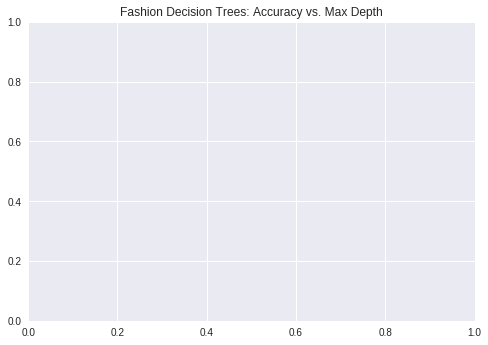

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Fashion Decision Trees: Accuracy vs. Max Depth')
#plt.ylim((0.9,1))
plt.plot(depths, list(train_acc), '-', label='train accuracy')
plt.errorbar(depths, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), elinewidth=3,linestyle='-', label='cross validation accuracy error')
plt.plot(depths, list(test_acc),linestyle='-', label='test accuracy ')


plt.savefig('depth_accuracy_fashion')
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Percent Accuracy")
plt.show()


from google.colab import files
plt.savefig("depth_accuracy_fashion.png")
files.download("depth_accuracy_fashion.png")




In [0]:
!cp depth_accuracy_fashion.png drive/My\ Drive/

cp: cannot create regular file 'drive/My Drive/': No such file or directory


In [0]:
import numpy as np
np.savetxt("train_acc_fashion.csv", train_acc, delimiter=",", fmt='%s')
np.savetxt("cross_val_acc_avg_fashion.csv", cross_val_acc_avg, delimiter=",", fmt='%s')
np.savetxt("cross_val_acc_std_fashion.csv", cross_val_acc_std, delimiter=",", fmt='%s')

#train_acc.to_csv('train_acc_fashion.csv')
#cross_val_acc_avg.to_csv('cross_val_acc_avg_fashion.csv')
#cross_val_acc_std.to_csv("cross_val_acc_std_fashion.csv")

In [0]:
!cp train_acc_fashion.csv drive/My\ Drive/
!cp cross_val_acc_avg_fashion.csv drive/My\ Drive/
!cp cross_val_acc_std_fashion.csv drive/My\ Drive/

In [0]:
#learning curves
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score

portions = range(10,101, 10)
print("her")
features = df.loc[:,"pixel1":"pixel784"]
X_train, X_test, y_train, y_test = train_test_split(features,df["label"], test_size=0.25)

train_acc=[]
cross_val_acc_std=[]
cross_val_acc_avg=[]
estimators =[]
test_acc = []
for i, k in enumerate(portions):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=8)
  #scores_precision = cross_validate(clf, X_train, y_train, cv=3, scoring='precision',return_train_score=True,return_estimator=False)
  #scores_recall =cross_validate(clf, X_train, y_train, cv=3, scoring='recall',average='macro',return_train_score=True,return_estimator=False)
  end = int(len(X_train)* k/100.0)
  scores_acc =cross_validate(clf, X_train[:end], y_train[:end], cv=3, scoring='accuracy',return_train_score=True,return_estimator=True)

  train_acc.append(scores_acc['train_score'][0])
  cross_val_acc_std.append(np.std(scores_acc['test_score']))
  cross_val_acc_avg.append(np.average(scores_acc['test_score']))
  ind= np.argmax(scores_acc['test_score'])
  test_pred_acc = scores_acc['estimator'][ind].predict(X_test)
  estimators.append(scores_acc['estimator'][ind])
  test_acc.append(accuracy_score(test_pred_acc, y_test))

 

her


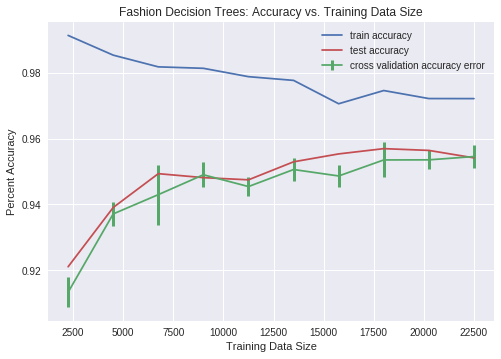

<Figure size 576x396 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Fashion Decision Trees: Accuracy vs. Training Data Size')
#plt.ylim((0.8,1))
ps = [int(len(X_train)* p/100.0) for p in portions]
plt.plot(ps, list(train_acc), '-', label='train accuracy')
plt.errorbar(ps, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), elinewidth=3,linestyle='-', label='cross validation accuracy error')
plt.plot(ps, list(test_acc),linestyle='-', label='test accuracy ')


plt.savefig('depth_accuracy_fashion')
plt.legend()
plt.xlabel("Training Data Size")
plt.ylabel("Percent Accuracy")
plt.show()


from google.colab import files
plt.savefig("depth_accuracy_fashion.png")
files.download("depth_accuracy_fashion.png")

In [0]:
test_acc

[0.9210666666666667,
 0.9390666666666667,
 0.9493333333333334,
 0.9481333333333334,
 0.9474666666666667,
 0.9529333333333333,
 0.9553333333333334,
 0.9569333333333333,
 0.9564,
 0.9541333333333334]